# GGR274 Lab 5: Data Transformations, Grouped Data, and Data Visualization

## Logistics

Like last week, our lab grade will be based on attendance and submission of a few small tasks to MarkUs during the lab session (or by 23:59 on Thursday).

Complete the tasks in this Jupyter notebook and submit your completed file to [MarkUs](https://markus-ds.teach.cs.toronto.edu).
Here are the instructions for submitting to MarkUs (same as last week):

1. Download this file (`Lab_5.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **lab5** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

Note: there's no autograding set up for this week's lab, but your TA will be checking that your submitted lab file is complete as part of your "lab attendance" grade.

## Lab 5 Introduction

In this lab, you will work with  a data set called `time_use_prov`. This is a data set is derived from the Statistics Canada General Social Survey's (GSS) Time Use (TU) Survey Main File, as well as a data set containing information on aggregated provincial data. This week you will plot box plots, bar graphs, and use the logical operators from Week 4 material to develop subset data sets to visualize data on.

As usual, these labs are meant to facilitate your understanding of the material from lectures in a low-stakes environment. Please feel free to refer to your lecture content, collaborate with your peers, and seek out help from your TAs.

## Task 1

Read CSV file `'time_use_prov.csv'` into a pandas `DataFrame` named `prov_data`.

In [15]:
import pandas as pd

prov_data = pd.read_csv('time_use_prov.csv')

prov_data.head()

,Unnamed: 0,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Prov_ab,Employment Rate,Pct house over 30,region,Income
0,0,10000,1,5,5,1,0,1,510,0,MB,61.7,11.4,Prairies,68147.0
1,1,10009,1,6,3,1,0,6,540,0,MB,61.7,11.4,Prairies,68147.0
2,2,10016,2,7,1,1,0,6,660,0,MB,61.7,11.4,Prairies,68147.0
3,3,10023,1,6,1,2,0,3,330,0,MB,61.7,11.4,Prairies,68147.0
4,4,10047,2,7,1,1,0,3,510,0,MB,61.7,11.4,Prairies,68147.0


In [16]:
prov_data.describe()

,Unnamed: 0,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Employment Rate,Pct house over 30,Income
count,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000
mean,8694.500000,18694.500000,1.264002,4.260035,2.822312,1.554974,0.347441,3.056067,522.393099,167.877228,59.299948,15.439856,69736.014836
std,5020.204926,5020.204926,0.504107,1.763916,2.084380,0.496983,0.755936,5.875343,133.063959,246.115440,3.489940,3.953390,9444.009443
min,0.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,49.500000,10.300000,59347.000000
25%,4347.250000,14347.250000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,450.000000,0.000000,59.500000,12.000000,59822.000000
50%,8694.500000,18694.500000,1.000000,4.000000,2.000000,2.000000,0.000000,2.000000,510.000000,0.000000,59.600000,12.900000,69995.000000
75%,13041.750000,23041.750000,1.000000,6.000000,5.000000,2.000000,0.000000,4.000000,585.000000,425.000000,59.900000,19.800000,74287.000000
max,17389.000000,27389.000000,3.000000,7.000000,6.000000,2.000000,3.000000,98.000000,1440.000000,1310.000000,65.400000,20.700000,93835.000000


## Task 2

In [17]:
prov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17390 entries, 0 to 17389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17390 non-null  int64  
 1   Participant ID     17390 non-null  int64  
 2   Urban/Rural        17390 non-null  int64  
 3   Age Group          17390 non-null  int64  
 4   Marital Status     17390 non-null  int64  
 5   sex                17390 non-null  int64  
 6   Kids under 14      17390 non-null  int64  
 7   Feeling Rushed     17390 non-null  int64  
 8   Sleep duration     17390 non-null  int64  
 9   Work duration      17390 non-null  int64  
 10  Prov_ab            17390 non-null  object 
 11  Employment Rate    17390 non-null  float64
 12  Pct house over 30  17390 non-null  float64
 13  region             17390 non-null  object 
 14  Income             17390 non-null  float64
dtypes: float64(3), int64(10), object(2)
memory usage: 2.0+ MB


a) Create a new column in `prov_data` named `'age_bin'`.  The values of `'age_bin'` should be obtained from the `'age'` column in `prov_data` which has the values:

```
            Age group of respondent (groups of 10)

           VALUE  LABEL
               1  15 to 24 years
               2  25 to 34 years
               3  35 to 44 years
               4  45 to 54 years
               5  55 to 64 years
               6  65 to 74 years
               7  75 years and over
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated
```

`'age_bin'` should have the values `'youth'`, `'young'`, `'middle'`, `'senior'` defined as :

- `'youth'`  : ages 15-24
- `'young'`  : ages 25-44
- `'middle'` : ages 45-64
- `'senior'` : ages 65+

In [18]:
prov_data['Age Group'].value_counts()

Age Group
5    3741
6    2958
4    2789
3    2597
2    2127
7    1875
1    1303
Name: count, dtype: int64

In [42]:
age_bin = prov_data
age_bin.loc[age_bin['Age Group'] == 1, 'age_bin'] = 'youth'   # 15-24 years
age_bin.loc[age_bin['Age Group'].isin([2, 3]), 'age_bin'] = 'young'
age_bin.loc[age_bin['Age Group'].isin([4, 5]), 'age_bin'] = 'middle'
age_bin.loc[age_bin['Age Group'].isin([6, 7]), 'age_bin'] = 'senior'  # 65 years and over

In [43]:
age_bin.head()

,Unnamed: 0,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Prov_ab,Employment Rate,Pct house over 30,region,Income,Age group label,age_bin
0,0,10000,1,5,5,1,0,1,510,0,MB,61.7,11.4,Prairies,68147.0,senior,middle
1,1,10009,1,6,3,1,0,6,540,0,MB,61.7,11.4,Prairies,68147.0,senior,senior
2,2,10016,2,7,1,1,0,6,660,0,MB,61.7,11.4,Prairies,68147.0,senior,senior
3,3,10023,1,6,1,2,0,3,330,0,MB,61.7,11.4,Prairies,68147.0,senior,senior
4,4,10047,2,7,1,1,0,3,510,0,MB,61.7,11.4,Prairies,68147.0,senior,senior


b) Compute the distribution of `age_bin` as a count, and store this in `age_bin_count_dist`. Then compute `age_bin` as a proportion of the total population, and store this in `age_bin_prop_dist`.

In [33]:
# Compute count distribution of 'age_bin'
age_bin_count_dist = age_bin['age_bin'].value_counts()

# Compute proportion distribution of 'age_bin'
age_bin_prop_dist = age_bin['age_bin'].value_counts(normalize=True)

# Display count distribution
print("Count distribution of age_bin:")
print(age_bin_count_dist)

# Display proportion distribution
print("\nProportion distribution of age_bin:")
print(age_bin_prop_dist)

Count distribution of age_bin:
age_bin
middle    6530
senior    4833
young     4724
youth     1303
Name: count, dtype: int64

Proportion distribution of age_bin:
age_bin
middle    0.375503
senior    0.277918
young     0.271650
youth     0.074928
Name: proportion, dtype: float64


In [34]:
print("Sum of proportions:", age_bin_prop_dist.sum())

Sum of proportions: 1.0


In [35]:
# To get the counts of each bin, you can use the value_counts method
age_bin_count_dist = age_bin['age_bin'].value_counts()

# To get the proportions of each bin, you can divide the counts by the length of the data
age_bin_prop_dist = age_bin_count_dist / len(age_bin)

# Display the count distribution
print("Count distribution of age_bin:")
print(age_bin_count_dist)

# Display the proportion distribution
print("\nProportion distribution of age_bin:")
print(age_bin_prop_dist)

Count distribution of age_bin:
age_bin
middle    6530
senior    4833
young     4724
youth     1303
Name: count, dtype: int64

Proportion distribution of age_bin:
age_bin
middle    0.375503
senior    0.277918
young     0.271650
youth     0.074928
Name: count, dtype: float64


c) Sort the values of `age_bin_prop_dist` in ascending order (smallest to largest) using the `sort_values` method.  The code is

```python
age_bin_prop_dist.sort_values(ascending = True, inplace = True)
```

The `inplace = True` parameter in `sort_values` modifies `age_bin_prop_dist`.  What do you predict would happen to `age_bin_prop_dist` if we used `age_bin_prop_dist.sort_values(ascending=True, inplace = False)` instead? 

In [36]:
sorted_age_bin_prop_dist = age_bin_prop_dist.sort_values(ascending=True, inplace=True)
print(sorted_age_bin_prop_dist)

None


In [37]:
sorted_age_bin_prop_dist = age_bin_prop_dist.sort_values(ascending=True, inplace=False)
print(sorted_age_bin_prop_dist)

age_bin
youth     0.074928
young     0.271650
senior    0.277918
middle    0.375503
Name: count, dtype: float64


In [38]:
age_bin_prop_dist.sort_values(ascending=True, inplace=True)
print(age_bin_prop_dist)

age_bin
youth     0.074928
young     0.271650
senior    0.277918
middle    0.375503
Name: count, dtype: float64


In [39]:
age_bin_prop_dist.sort_values(ascending=True, inplace=False)
print(age_bin_prop_dist)

age_bin
youth     0.074928
young     0.271650
senior    0.277918
middle    0.375503
Name: count, dtype: float64


c) Create a bar plot of `age_bin_prop_dist`. 

_Feel free to explore different aesthetic options by changing paramters for the plotting function. (See the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html).)_

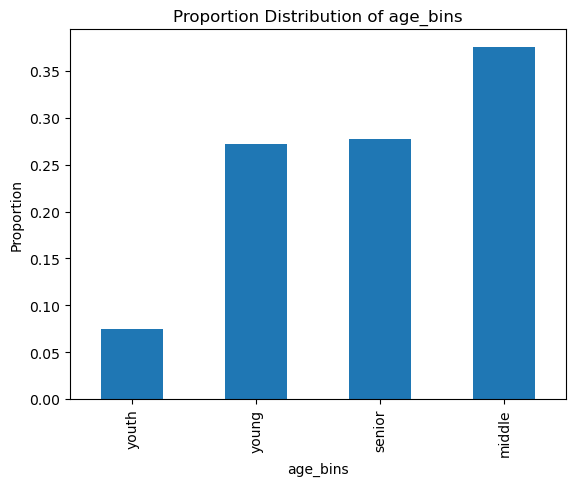

In [40]:
import matplotlib.pyplot as plt

# Plot the bar plot
age_bin_prop_dist.plot(kind='bar')

# Add title and labels
plt.title('Proportion Distribution of age_bins')
plt.xlabel('age_bins')
plt.ylabel('Proportion')

# Show the plot
plt.show()

## Task 3

a) Create a boxplot of `Sleep duration` by `age_bin`.  Store this plot in `sleep_by_age_boxplots`.  Use `figsize = (8, 8)` in the `pandas.DataFrame.boxplot` function. 

b) Set the label on the y-axis (vertical axis) to `Sleep duration` by using the `.set_ylabel()` method, as follows:

```python
sleep_by_age_boxplots.set_ylabel('Sleep duration')
```

_Feel free to customize the plot further to your liking with the help of the [documention](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)._

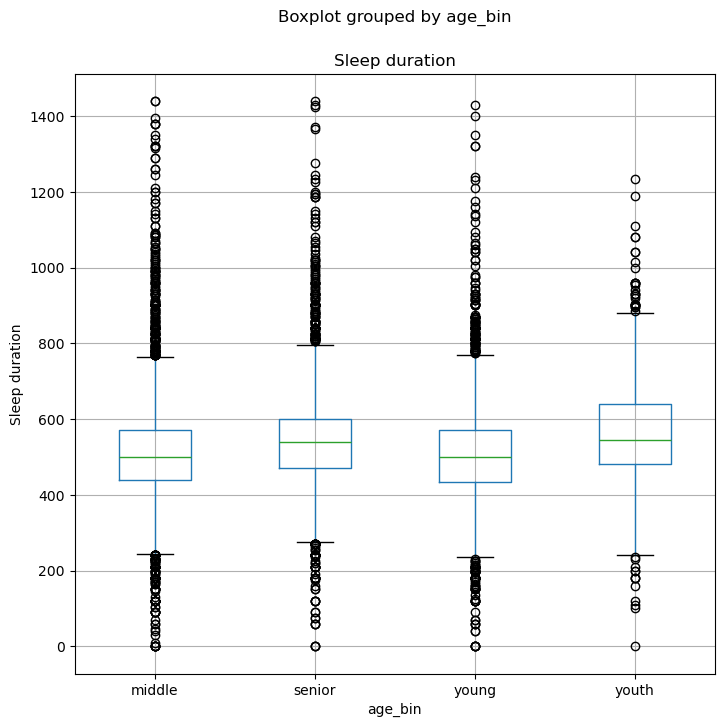

In [41]:
# Create a boxplot of Sleep duration by age_bin
sleep_by_age_boxplots = prov_data.boxplot(column = 'Sleep duration', by = 'age_bin', figsize = (8, 8))

# Set the label on the y-axis
sleep_by_age_boxplots.set_ylabel('Sleep duration')

# Show the plot
plt.show()